In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
sns.set_theme()
plt.rcParams['figure.figsize'] = [8,8]

In [8]:
concrete = pd.read_csv("concrete.csv")
concrete.columns

Index(['Cement', 'Slag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'Strength'],
      dtype='object')

In [9]:
concrete = concrete.query("Age == 28").filter(["Cement","Water","Strength"])
concrete.shape

(425, 3)

In [10]:
concrete = concrete.assign(Ratio = concrete.Water / concrete.Cement)
concrete.head()

,Cement,Water,Strength,Ratio
0,540.0,162.0,79.986111,0.300000
1,540.0,162.0,61.887366,0.300000
7,380.0,228.0,36.447770,0.600000
8,266.0,228.0,45.854291,0.857143
9,475.0,228.0,39.289790,0.480000


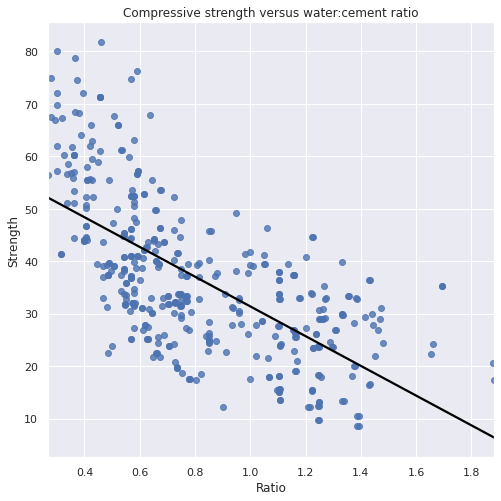

In [11]:
sns.regplot(data=concrete, x="Ratio", y="Strength", 
            ci=None, line_kws={"color":"black"})
plt.title("Compressive strength versus water:cement ratio")
plt.savefig("concrete_wc.png")

In [12]:
concrete_model = smf.ols("Strength ~ Ratio", data=concrete)
concrete_fit = concrete_model.fit()
concrete_fit.params

Intercept    59.715327
Ratio       -28.327601
dtype: float64

In [13]:
np.sqrt( concrete_fit.scale )

11.126954715362588

In [14]:
concrete.Strength.corr( concrete.Ratio )

-0.6551873840990604

In [15]:
concrete_fit.rsquared

0.4292705082825695

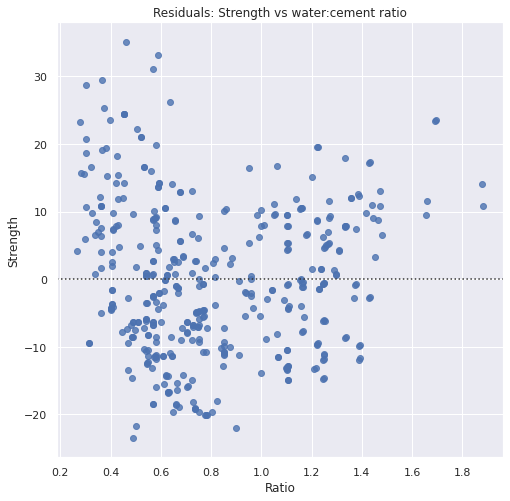

In [16]:
sns.residplot(data=concrete, x="Ratio", y="Strength", 
              line_kws = {"color" : "black"})
plt.title("Residuals: Strength vs water:cement ratio")
plt.savefig("concrete_wc_res.png")

In [17]:
concrete = concrete.assign(Ratio = concrete.Cement / concrete.Water )
concrete.head()

,Cement,Water,Strength,Ratio
0,540.0,162.0,79.986111,3.333333
1,540.0,162.0,61.887366,3.333333
7,380.0,228.0,36.447770,1.666667
8,266.0,228.0,45.854291,1.166667
9,475.0,228.0,39.289790,2.083333


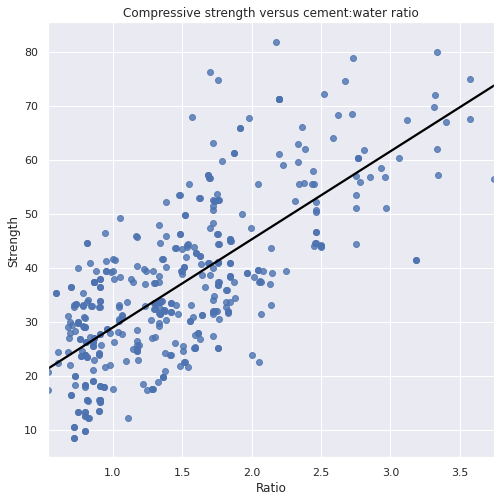

In [18]:
sns.regplot(data=concrete, x="Ratio", y="Strength", 
            ci=None, line_kws={"color":"black"})
plt.title("Compressive strength versus cement:water ratio")
plt.savefig("concrete_cw.png")

In [19]:
concrete.Strength.corr( concrete.Ratio )

0.7251376169406446

In [20]:
concrete_model = smf.ols("Strength ~ Ratio", data=concrete)
concrete_fit = concrete_model.fit()
concrete_fit.params

Intercept    12.59679
Ratio        16.31580
dtype: float64

In [21]:
concrete_rse = np.sqrt( concrete_fit.scale )
concrete_rse

10.142165416378145

In [22]:
concrete_fit.rsquared

0.5258245635023568

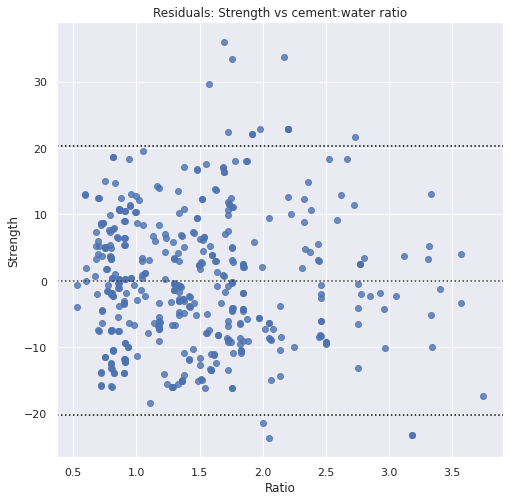

In [23]:
sns.residplot(data=concrete, x="Ratio", y="Strength", 
              line_kws = {"color" : "black"})
plt.axhline( 2*concrete_rse, color="black", linestyle=":")
plt.axhline( -2*concrete_rse, color="black", linestyle=":")
plt.title("Residuals: Strength vs cement:water ratio")
plt.savefig("concrete_cw_res.png")

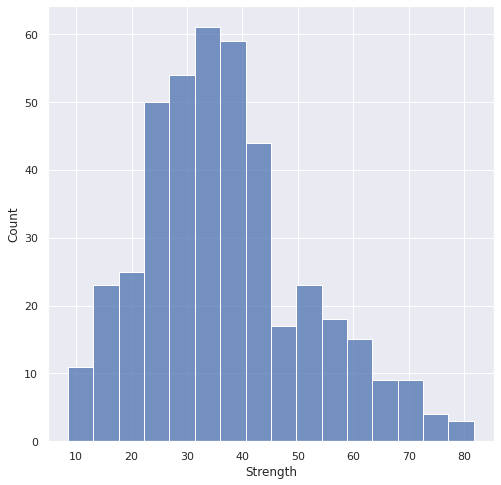

In [24]:
sns.histplot( data=concrete, x="Strength")
plt.savefig("concrete_strength.png")

In [25]:
print(concrete_fit.summary() )

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     469.1
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.54e-70
Time:                        20:19:48   Log-Likelihood:                -1586.6
No. Observations:                 425   AIC:                             3177.
Df Residuals:                     423   BIC:                             3185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5968      1.219     10.335      0.0

In [26]:
concrete_fit.conf_int()

,0,1
Intercept,10.201068,14.992512
Ratio,14.835056,17.796543


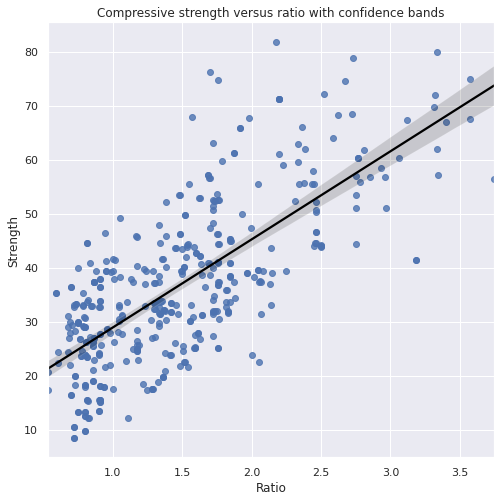

In [27]:
sns.regplot( data=concrete, x="Ratio", y="Strength", 
             line_kws = {"color" : "black"})
plt.title("Compressive strength versus ratio with confidence bands")
plt.savefig("concrete_cw_with_ci.png")